1. Цены на мобильные телефоны https://www.kaggle.com/datasets/dewangmoghe/mobile-phone-price-prediction
2. Цены на акции Starbucks https://www.kaggle.com/datasets/mayankanand2701/starbucks-stock-price-dataset
3. Цены на золото https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset

**Датасет 1. Цены мобильных телефонов**
1. **Name**: Название модели мобильного телефона.
2. **Rating**: Рейтинг мобильного телефона (по отзывам пользователей).
3. **Spec_score**: Оценка спецификаций телефона (возможно, по различным характеристикам).
4. **No_of_sim**: Количество SIM-карт, поддерживаемых телефоном.
5. **Ram**: Объем оперативной памяти (RAM) в гигабайтах.
6. **Battery**: Емкость батареи в мАч.
7. **Display**: Размер дисплея в дюймах.
8. **Camera**: Разрешение камеры (в мегапикселях).
9. **External_Memory**: Поддержка внешней памяти (да/нет).
10. **Android_version**: Версия операционной системы Android.
11. **Price**: Цена мобильного телефона в долларах США.
12. **Company**: Производитель телефона.
13. **Inbuilt_memory**: Объем встроенной памяти (в гигабайтах).
14. **Fast_charging**: Наличие быстрой зарядки (да/нет).
15. **Screen_resolution**: Разрешение экрана (в пикселях).
16. **Processor**: Тип процессора.
17. **Processor_name**: Наименование процессора.

**Объект наблюдения**: Каждый объект представляет собой отдельный мобильный телефон.\
**Связи между объектами**: Внутри одного объекта есть взаимосвязь между характеристиками и его ценой. Например, объем оперативной памяти, емкость батареи, качество камеры и поддержка быстрой зарядки могут влиять на цену.\
**Бизнес-цель**: Оптимизация продаж мобильных телефонов, оценка цен в зависимости от характеристик.\
**Эффект для бизнеса**: Более точная оценка стоимости мобильных телефонов может помочь производителям предлагать конкурентоспособные цены и максимизировать прибыль.\
**Техническая цель**: Построение модели машинного обучения для прогнозирования цены мобильного телефона на основе его характеристик.\
* **Вход**: Характеристики мобильного телефона (объем RAM, емкость батареи, качество камеры и т.д.).\
* **Целевой признак**: Цена мобильного телефона. 

Index(['id', 'Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram', 'Battery',
       'Display', 'Camera', 'External_Memory', 'Android_version', 'Price',
       'company', 'Inbuilt_memory', 'fast_charging', 'Screen_resolution',
       'Processor', 'Processor_name'],
      dtype='object')
Зашумленные столбцы: []
Смещение: id                   0.000000
Name                -0.023604
Rating              -0.066979
Spec_score          -0.739377
No_of_sim            1.664627
Ram                 -0.899798
Battery             -0.814522
Display             -0.101507
Camera              -0.259205
External_Memory     -2.033547
Android_version      0.584967
Price                0.080087
company             -0.760020
Inbuilt_memory       1.061234
fast_charging        0.217571
Screen_resolution    0.702418
Processor           -5.671454
Processor_name      -0.159994
dtype: float64
Сильно смещенные столбцы: ['No_of_sim', 'External_Memory', 'Inbuilt_memory', 'Processor']
Выбросы в столбце 'id':
Series([], 

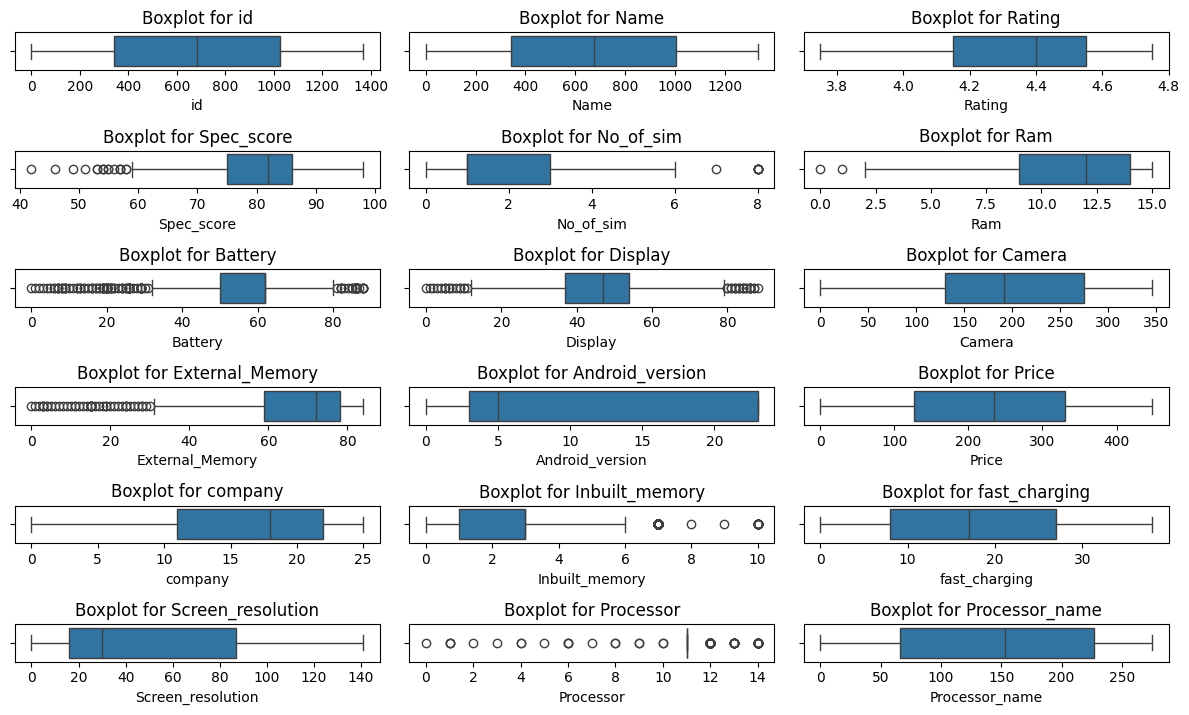

Просачивание данных: Высокая корреляция (-0.26) между столбцами 'id' и 'Name'
Просачивание данных: Высокая корреляция (-0.30) между столбцами 'id' и 'company'
Просачивание данных: Высокая корреляция (-0.26) между столбцами 'Name' и 'id'
Просачивание данных: Высокая корреляция (-0.21) между столбцами 'Name' и 'Android_version'
Просачивание данных: Высокая корреляция (0.96) между столбцами 'Name' и 'company'
Просачивание данных: Высокая корреляция (-0.44) между столбцами 'Spec_score' и 'No_of_sim'
Просачивание данных: Высокая корреляция (0.49) между столбцами 'Spec_score' и 'Display'
Просачивание данных: Высокая корреляция (0.22) между столбцами 'Spec_score' и 'Camera'
Просачивание данных: Высокая корреляция (-0.46) между столбцами 'Spec_score' и 'External_Memory'
Просачивание данных: Высокая корреляция (0.35) между столбцами 'Spec_score' и 'Android_version'
Просачивание данных: Высокая корреляция (-0.27) между столбцами 'Spec_score' и 'Inbuilt_memory'
Просачивание данных: Высокая коррел

In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/mobile_prices.csv")
print(df.columns)

# Кодируем все строковые столбцы в числовые
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Проверка на пропуски и "зашумленные" столбцы
noisy_features = []
for col in df.columns:
    if df[col].isnull().sum() / len(df) > 0.1:  # Если более 10% пропусков
        noisy_features.append(col)
print(f"Зашумленные столбцы: {noisy_features}")

# Проверка на смещение
skewness = df.skew()
print(f"Смещение: {skewness}")

skewed_features = skewness[abs(skewness) > 1].index.tolist()
print(f"Сильно смещенные столбцы: {skewed_features}")

# Поиск выбросов
for col in df.select_dtypes(include=["number"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Выбросы в столбце '{col}':\n{outliers}\n")

# Визуализация выбросов
numeric_cols = df.select_dtypes(include=["number"]).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

if len(df.columns) >= 2:
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:
                correlation = df[col1].corr(df[col2])
                if abs(correlation) > 0.2:
                    print(f"Просачивание данных: Высокая корреляция ({correlation:.2f}) между столбцами '{col1}' и '{col2}'")

# Логарифмирование признака 'Battery'
df["log_Battery"] = np.log(df["Battery"] + 1)

# Заполнение пропусков
df["Battery"] = df["Battery"].fillna(df["Battery"].mean())


# Функция для разбиения на train/val/test
def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
):
    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )

    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))

    X = df_input
    y = df_input[[stratify_colname]]

    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test


# Разбиение на train/val/test
data = df[["Ram", "Price", "company"]].copy()

print("@data", data)

data = data.groupby("company").filter(
    lambda x: len(x) > 4
)  # убираем классы с одним элементом

df_train, df_val, df_test = split_stratified_into_train_val_test(
    data, stratify_colname="company", frac_train=0.60, frac_val=0.20, frac_test=0.20
)

print("Обучающая выборка: ", df_train.shape)
print(df_train["Ram"].value_counts())

print("Контрольная выборка: ", df_val.shape)
print(df_val["Ram"].value_counts())

print("Тестовая выборка: ", df_test.shape)
print(df_test["Ram"].value_counts())